# **Project 38: Advertisement Classifier**

***pandas*** : *A library for data manipulation and analysis, providing data structures like DataFrames.*

***nltk*** : *The Natural Language Toolkit, used for processing and analyzing human language data.*

***re*** : *A module for performing regular expression operations in Python.*

***nltk.stopwords*** : *A collection of common stopwords used in text processing to filter out non-essential words.*

***matplotlib*** : *A plotting library for creating static, interactive, and animated visualizations in Python.*

# **Data Loading**

**Importing these modules for Data Loading, Data Cleaning, Data Visualization(EDA).**

In [239]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt

**"df = pd.read_csv('/content/Videos_data.csv')": Loads the CSV file Videos_data.csv into a DataFrame named df.**

**"df.head(5)": Displays the first 5 rows of the DataFrame df.**

In [240]:
df = pd.read_csv('/content/Videos_data.csv')
df.head(5)

,Unnamed: 0,Video Id,Title,Description,Category
0,0,ehmsJLZlCZ0,Ep 1| Travelling through North East India | Of...,"The journey to Arunachal, North East India beg...",travel
1,1,e2NQE41J5eM,How do I travel so much ! How do I earn money!!,SUBSCRIBE - https://goo.gl/dEtSMJ ('MountainTr...,travel
2,2,i9E_Blai8vk,TRAVEL VLOG ∙ Welcome to Bali | PRISCILLA LEE,I had the chance to fly out to Bali with my wh...,travel
3,3,#NAME?,GOA TRAVEL DIARY | FOUR DAYS IN GOA | TRAVEL O...,Hope you enjoy MY GOA TRAVEL DIARY this video!...,travel
4,4,7ByoBJYXU0k,5 Steps to Becoming a Travel Blogger,"Travel blogger, Nikki Vargas, of The Pin the M...",travel


# **Data Visualization**

**Category_counts calculates the count of each category.**

**plt.pie creates the pie chart with percentage labels and category names.**

**plt.cm.Paired provides a color palette for better visual differentiation.**

**plt.title adds a title to the pie chart.**

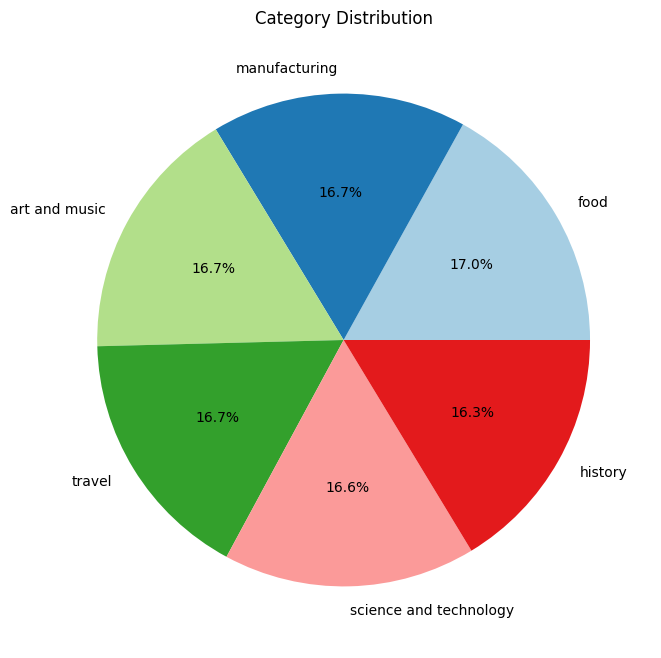

In [271]:
Category_counts = df["Category"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(Category_counts, autopct="%1.1f%%", labels=Category_counts.index, colors=plt.cm.Paired(range(len(Category_counts))))
plt.title('Category Distribution')
plt.show()

**Category Counts Bar Chart:**

- **Category_counts computes the count of each category.**

- **plt.bar creates a bar chart where each bar represents a category and its count.**

**Average Lengths Bar Chart:**

- **df['Title_Length'] and df['Description_Length'] compute the lengths of titles and descriptions.**

- **avg_lengths calculates the average length for each type.**
- **plt.bar creates a bar chart showing the average lengths.**

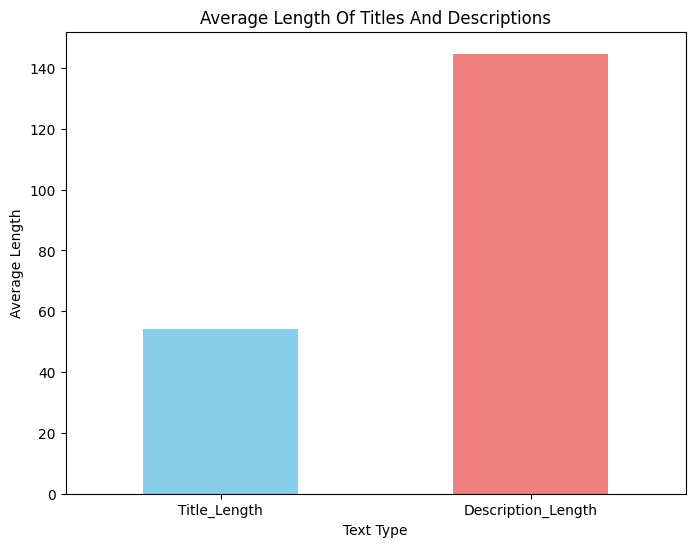

In [276]:
df['Title_Length'] = df['Title'].apply(len)
df['Description_Length'] = df['Description'].apply(len)

avg_lengths = df[['Title_Length', 'Description_Length']].mean()

plt.figure(figsize=(8, 6))
avg_lengths.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Average Length Of Titles And Descriptions')
plt.xlabel('Text Type')
plt.ylabel('Average Length')
plt.xticks(rotation=0)
plt.show()

# **Data Cleaning**

**"df.drop(columns = ['Unnamed: 0'], inplace = True)": Removes the column Unnamed: 0 from the DataFrame df.**

**"df.isnull().sum()": Counts the number of missing values in each column of the DataFrame df.**

In [241]:
df.drop(columns = ["Unnamed: 0"], inplace = True)

df.isnull().sum()

,0
Video Id,0
Title,0
Description,334
Category,0


**"df = df.dropna(how='any')": Removes any rows in the DataFrame df that contain missing values.**

**"df.shape": Displays the shape of the DataFrame df after removing rows with missing values.**

In [242]:
df = df.dropna(how='any')
df.shape

(9999, 4)


**"nltk.download('stopwords')": Downloads the stopwords dataset for natural language processing using NLTK.**

**"nltk.download('wordnet')": Downloads the WordNet corpus for lemmatization and other text processing tasks using NLTK.**

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

**"stop_words = set(stopwords.words('english'))": Loads and initializes a set of English stopwords from NLTK.**

**"new_words = [...]; stop_words = list(stop_words.union(new_words))": Adds additional words to the stopwords set and converts it back to a list.**

In [243]:
stop_words = set(stopwords.words('english'))

new_words = ["fig","figure","image","sample","using",
             "show", "result", "large",
             "also", "one", "two", "three",
             "four", "five", "seven","eight","nine"]

stop_words = list(stop_words.union(new_words))

**"from nltk.stem.wordnet import WordNetLemmatizer": Imports the WordNetLemmatizer class for lemmatization from NLTK.**

**"def pre_process(text):" : Defines a function to preprocess and clean text by converting to lowercase, removing HTML tags, non-alphanumeric characters, stopwords, and short words, then lemmatizing the remaining words.**

In [245]:
from nltk.stem.wordnet import WordNetLemmatizer

def pre_process(text):

    text=text.lower()

    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)

    text=re.sub("(\\d|\\W)+"," ",text)

    text = text.split()

    text = [word for word in text if word not in stop_words]

    text = [word for word in text if len(word) >= 3]

    lmtzr = WordNetLemmatizer()

    text = [lmtzr.lemmatize(word, "v") for word in text]

    return ' '.join(text)

**"df = df.sample(frac=1).reset_index(drop=True)": Shuffles and resets the index of the DataFrame df.**

**Creates a new DataFrame docs with the first 5000 preprocessed entries from the Title and Description columns of df.**

In [247]:
df = df.sample(frac=1).reset_index(drop=True)
docs = pd.DataFrame()
docs['Title'] = df['Title'].iloc[:5000].apply(lambda x:pre_process(x))
docs['Description'] = df['Description'].iloc[:5000].apply(lambda x:pre_process(x))

**docs.head(): Displays the first five rows of the DataFrame docs, showing the preprocessed Title and Description columns.**

In [248]:
docs.head()

,Title,Description
0,chainsmokers sick boy official music video,sick boy http smarturl sickboy follow chainsmo...
1,travel japan style days,week travel across north japan style travel ar...
2,street food official trailer netflix,creators chef table come new mouth water docum...
3,history bts,whole history bts debut subscribe http bite jc...
4,ways make better decisions think like computer...,ever struggle make decisions talk cognitive sc...


**docs['classes'] = df['Category']: Adds a new column classes to docs containing the Category values from df.**

**docs['classes'].value_counts(): Shows the count of each unique value in the classes column.**

In [250]:
docs['classes'] = df['Category']
docs['classes'].value_counts()

,count
classes,
manufacturing,855
travel,848
food,830
art and music,829
science and technology,821
history,817


**LabelEncoder: Converts categorical labels into numeric values.**

**le.fit(docs['classes']); docs['classes'] = le.transform(docs['classes']): Fits the encoder to the classes column and transforms it into numeric values.**

**docs.head(): Displays the first five rows of docs with the updated numeric classes column.**

In [251]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(docs['classes'])
docs['classes'] = le.transform(docs['classes'])
docs.head()

,Title,Description,classes
0,chainsmokers sick boy official music video,sick boy http smarturl sickboy follow chainsmo...,0
1,travel japan style days,week travel across north japan style travel ar...,5
2,street food official trailer netflix,creators chef table come new mouth water docum...,1
3,history bts,whole history bts debut subscribe http bite jc...,2
4,ways make better decisions think like computer...,ever struggle make decisions talk cognitive sc...,4


**le.classes_: Displays the unique class labels used by the LabelEncoder for transformation.**

In [252]:
le.classes_

array(['art and music', 'food', 'history', 'manufacturing',
       'science and technology', 'travel'], dtype=object)

# **Model Building**

**This code initializes two TfidfVectorizer instances for text feature extraction—one for titles and one for descriptions—using settings to handle term frequency, minimum document frequency, normalization, encoding, and n-grams.**

**It then transforms the text data into TF-IDF features, prints the shapes of the resulting feature arrays for titles and descriptions.**

In [253]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_title = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
tfidf_desc = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
labels = docs['classes']
features_title = tfidf_title.fit_transform(docs['Title']).toarray()
features_description = tfidf_desc.fit_transform(docs['Description']).toarray()
print('Title Features Shape: ' + str(features_title.shape))
print('Description Features Shape: ' + str(features_description.shape))

Title Features Shape: (5000, 1253)
Description Features Shape: (5000, 2632)


**Tokenizer: Converts text into sequences of integers based on word frequency.**

**pad_sequences: Pads sequences to ensure uniform input size for the model.**

**Sequential: Initializes a linear stack of layers for building a neural network model.**

**Dense: Adds fully connected layers to the neural network.**

**Embedding: Converts integer sequences into dense vectors of fixed size.**

**LSTM: Long Short-Term Memory layer for capturing dependencies in sequences.**

**SpatialDropout1D: Applies dropout to input sequences to prevent overfitting.**

**to_categorical: Converts class vectors to binary class matrices.**

**train_test_split: Splits data into training and testing sets for model evaluation.**

In [254]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

**MAX_NB_WORDS: The maximum number of unique words to be considered in the tokenizer.**

**MAX_SEQUENCE_LENGTH: The maximum length of input sequences; sequences longer than this are truncated, and shorter sequences are padded.**

**EMBEDDING_DIM: The dimension of the dense embedding vector for each word.**

In [255]:
MAX_NB_WORDS = 10000
MAX_SEQUENCE_LENGTH = 50
EMBEDDING_DIM = 100

**data_for_lstms: Combines the Title and Description into a single string for each document.**

**Tokenizer: Initializes a tokenizer to process text data, considering up to MAX_NB_WORDS unique tokens and filtering out punctuation.**

**fit_on_texts: Fits the tokenizer on the combined title and description data, building the word index.**

**word_index: Retrieves the word-to-index mapping, and prints the number of unique tokens found.**

In [257]:
titles = docs['Title'].values
descriptions = docs['Description'].values
data_for_lstms = []
for i in range(len(titles)):
    temp_list = [titles[i], descriptions[i]]
    data_for_lstms.append(' '.join(temp_list))

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data_for_lstms)
word_index = tokenizer.word_index
print('Found %s Unique Tokens.' % len(word_index))

Found 16432 Unique Tokens.


**texts_to_sequences: Converts the text data into sequences of integers based on the tokenizer's word index.**

**pad_sequences: Pads or truncates the sequences to ensure they all have the same length, MAX_SEQUENCE_LENGTH.**

**pd.get_dummies: Converts the class labels into one-hot encoded format.**

**Print statements: Outputs the shapes of the feature tensor X and the label tensor y.**

In [258]:
X = tokenizer.texts_to_sequences(data_for_lstms)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape Of Data Tensor:', X.shape)

y = pd.get_dummies(docs['classes']).values
print('Shape Of Label Tensor:', y.shape)

Shape Of Data Tensor: (5000, 50)
Shape Of Label Tensor: (5000, 6)


**This line of code splits the data into training and testing sets:**

- **X_train: Features for training.**
- **X_test: Features for testing.**
- **y_train: Labels for training.**
- **y_test: Labels for testing.**

**The random_state ensures reproducibility of the split.**

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

**This will show you the content of the first four entries in the titles array.**

In [260]:
titles[0:4]

array(['chainsmokers sick boy official music video',
       'travel japan style days', 'street food official trailer netflix',
       'history bts'], dtype=object)

**This will show the combined titles and descriptions for the first 4 items in your dataset.**

In [261]:
data_for_lstms[0:4]

['chainsmokers sick boy official music video sick boy http smarturl sickboy follow chainsmokers http www youtube com thechainsmokers http www twitter com thechainsmokers',
 'travel japan style days week travel across north japan style travel around japan style yukata http tohokubijin com top hana',
 'street food official trailer netflix creators chef table come new mouth water documentary series celebrate local heroes street food thailand india taiwan',
 'history bts whole history bts debut subscribe http bite jcf koreaboo korea gateway world koreaboo share trend']

**Embedding Layer: Transforms input data into dense vectors of fixed size (EMBEDDING_DIM).**

**SpatialDropout1D Layer: Applies dropout to the embeddings to prevent overfitting.**

**LSTM Layer: Processes sequences, with dropout applied to both inputs and recurrent connections.**

**Dense Layer: Outputs predictions with a softmax activation for multi-class classification.**

In [268]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.build(input_shape=(None, X.shape[1]))

print(model.summary())

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)             │ (None, 50, 100)             │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_14                 │ (None, 50, 100)             │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 6)                   │             606 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,081,006 (4.12 MB)

 Trainable params: 1,081,006 (4.12 MB)

 Non-trainable params: 0 (0.00 B)

None


**Your code trains the LSTM model on the training data for 10 epochs, using a batch size of 128 and a validation split of 20%. The history object will contain the training and validation metrics for each epoch, which you can use to evaluate the model's performance over time.**


**epochs=10: The model will be trained for 10 iterations over the entire training dataset.**

**batch_size=128: Each update to the model’s weights is based on a batch of 128 samples.**

**validation_split=0.2: 20% of the training data will be used for validation to monitor the model’s performance on unseen data during training.**

In [263]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_split=0.2)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 161ms/step - accuracy: 0.2796 - loss: 1.7756 - val_accuracy: 0.6373 - val_loss: 1.5767
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 0.5775 - loss: 1.4331 - val_accuracy: 0.8733 - val_loss: 0.6385
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - accuracy: 0.8716 - loss: 0.5556 - val_accuracy: 0.9520 - val_loss: 0.2531
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 203ms/step - accuracy: 0.9711 - loss: 0.1966 - val_accuracy: 0.9800 - val_loss: 0.1000
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - accuracy: 0.9803 - loss: 0.0828 - val_accuracy: 0.9773 - val_loss: 0.1275
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 172ms/step - accuracy: 0.9943 - loss: 0.0499 - val_accuracy: 0.9800 - val_loss: 0.0905
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 208ms/step - accuracy: 0.9932 - loss: 0.0394 - val_accuracy: 0.9760 - val_loss: 0.1200
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - accuracy: 0.9937 - loss: 0.0344 - val_accuracy: 0.

**This code snippet plots the loss values for both the training and validation datasets over the epochs, allowing you to visualize how the model's performance improved (or did not) during training.**

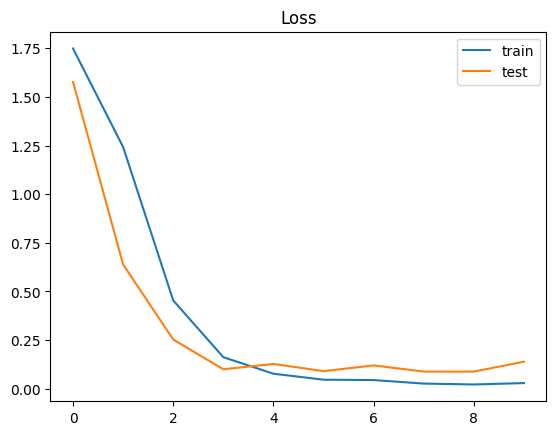

In [265]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

**This code snippet visualizes the accuracy metrics for both training and validation datasets over the epochs.**

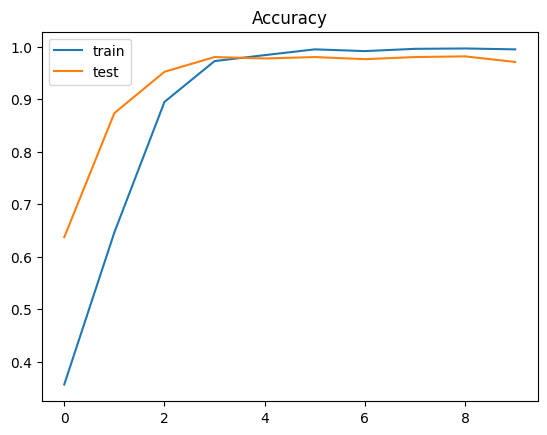

In [266]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

# **Save Model**

**This code snippet saves the Tokenizer object and the trained model.**

In [ ]:
import pickle

with open("Tokenizer.pickle", "wb") as file:
    pickle.dump(tokenizer, file)

model.save("Finalized-Model.h5")